![](data/banner.png)
# Objetivos
+ Crear un modelo exportable de aprendizaje supervisado usando clasificación con el algoritmo Naive Bayes

# Librerias

In [1]:
# Declaración de la semilla
seed = 161

# Para trabajar los datos
import pandas as pd
import numpy as np

# Para visualizar los datos
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# Vectorizar
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Split our dataset
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
# Para el uso de pipelines
from imblearn.pipeline import Pipeline

# Importar/ Exportar modelos
import joblib

# Modelo

Cargamos los datos

In [2]:
# Cargamos el dataset
file = "train"
df=pd.read_csv(f'data/{file}_preprocessed.csv', sep=',', encoding = 'utf-8')
df = df[["Emotion","processed_message"]]

In [3]:
df.head()

,Emotion,processed_message
0,sadness,humy humiliate
1,sadness,go hopeless damn hop around someon car awak go...
2,anger,grab minut post greedy wrong grab minute post ...
3,love,ev nostalg fireplac know stil property ever no...
4,anger,grouchy grouchy


Separamos el dataset

In [4]:
X = df["processed_message"]
Y = df['Emotion']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)

In [5]:
# Creamos el modelo básico
model = Pipeline(steps = [
    ("tf_idv",TfidfVectorizer()),
    ("mnv",MultinomialNB())
])
model

Pipeline(steps=[('tf_idv', TfidfVectorizer()), ('mnv', MultinomialNB())])

In [6]:
# Hiperparametros
param_grid = {'mnv__alpha': (1e-2, 1e-3)}

In [7]:
grid_selector = GridSearchCV(estimator = model, param_grid = param_grid, cv=10, n_jobs=-1)

In [8]:
grid_selector = grid_selector.fit(X_train,y_train)

In [9]:
final_model = grid_selector.best_estimator_
final_model

Pipeline(steps=[('tf_idv', TfidfVectorizer()),
                ('mnv', MultinomialNB(alpha=0.01))])

In [10]:
final_model.predict(["it amaz impress"])

array(['surprise'], dtype='<U8')

# Análisis del modelo

In [11]:
final_model.score(X_test,y_test)

0.7152083333333333

In [12]:
#Predictions
y_pred = final_model.predict(X_test)

In [13]:
# Classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.73      0.61      0.66       607
        fear       0.76      0.58      0.66       566
         joy       0.69      0.88      0.77      1581
        love       0.73      0.31      0.43       434
     sadness       0.73      0.82      0.78      1434
    surprise       0.71      0.19      0.30       178

    accuracy                           0.72      4800
   macro avg       0.73      0.56      0.60      4800
weighted avg       0.72      0.72      0.70      4800



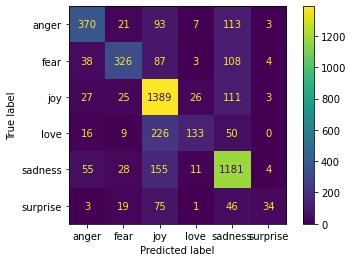

In [14]:
plot_confusion_matrix(final_model, X_test, y_test)

# Guardamos el modelo

In [15]:
pipeline_file = open("data/pipeline_MultinomialNB.joblib","wb")
joblib.dump(final_model,pipeline_file)
pipeline_file.close()